# Dataset walkthrough

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


In [4]:
data=pd.read_csv("BlackFriday.csv")

In [5]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# Analysing cols

In [6]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [7]:
del data["Product_Category_2"]
del data["Product_Category_3"]

In [8]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [9]:
data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Purchase                      0
dtype: int64

In [14]:
data["User_ID"].nunique()

5891

In [15]:
data["Product_ID"].nunique()

3623

In [16]:
data["Gender"].nunique()

2

In [17]:
data["Age"].nunique()

7

In [18]:
data["Occupation"].nunique()

21

In [19]:
data["City_Category"].nunique()

3

In [22]:
data["Marital_Status"].unique()

array([0, 1])

In [23]:
data["Product_Category_1"].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9])

In [25]:

for column in data.columns:
    print(column, ":" ,data[column].nunique())

User_ID : 5891
Product_ID : 3623
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 18
Purchase : 17959


# Analysing Gender

<Axes: title={'center': 'Gender ratio'}>

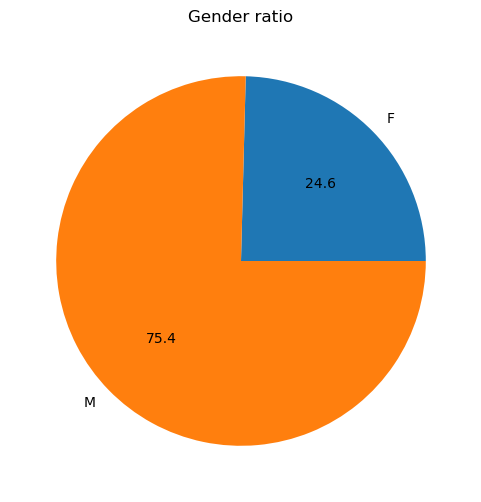

In [29]:
data.groupby("Gender").size().plot(kind="pie",autopct="%.1f",title="Gender ratio",figsize=(6,6))

<Axes: xlabel='Gender'>

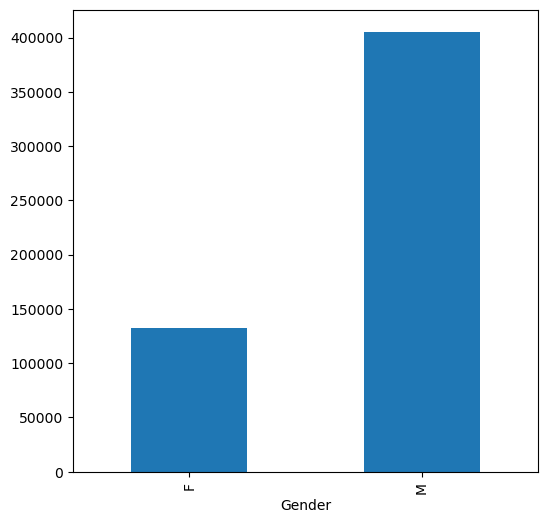

In [30]:
data.groupby('Gender').size().plot(kind = 'bar', 
                                 figsize = (6,6))

/var/folders/3y/lzqhbyv93v1c5dqddh3rqb6m0000gn/T/ipykernel_30159/1654981463.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("Gender").sum()["Purchase"].plot(kind="pie",autopct="%.1f")


<Axes: ylabel='Purchase'>

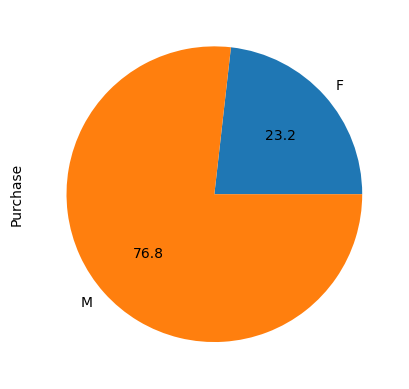

In [32]:
data.groupby("Gender").sum()["Purchase"].plot(kind="pie",autopct="%.1f")

/var/folders/3y/lzqhbyv93v1c5dqddh3rqb6m0000gn/T/ipykernel_30159/3727514008.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("Gender").mean()["Purchase"].plot(kind="pie",autopct="%.1f")


<Axes: ylabel='Purchase'>

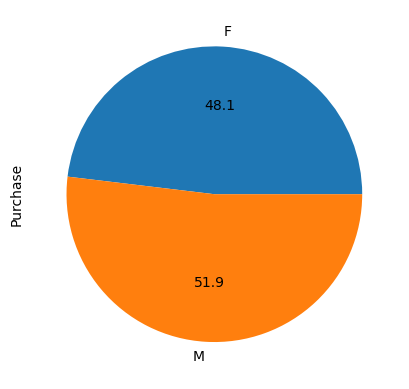

In [33]:
data.groupby("Gender").mean()["Purchase"].plot(kind="pie",autopct="%.1f")

# Analysing Age & Marital Status

<Axes: title={'center': 'Purchase Distribution by Age'}, xlabel='Age'>

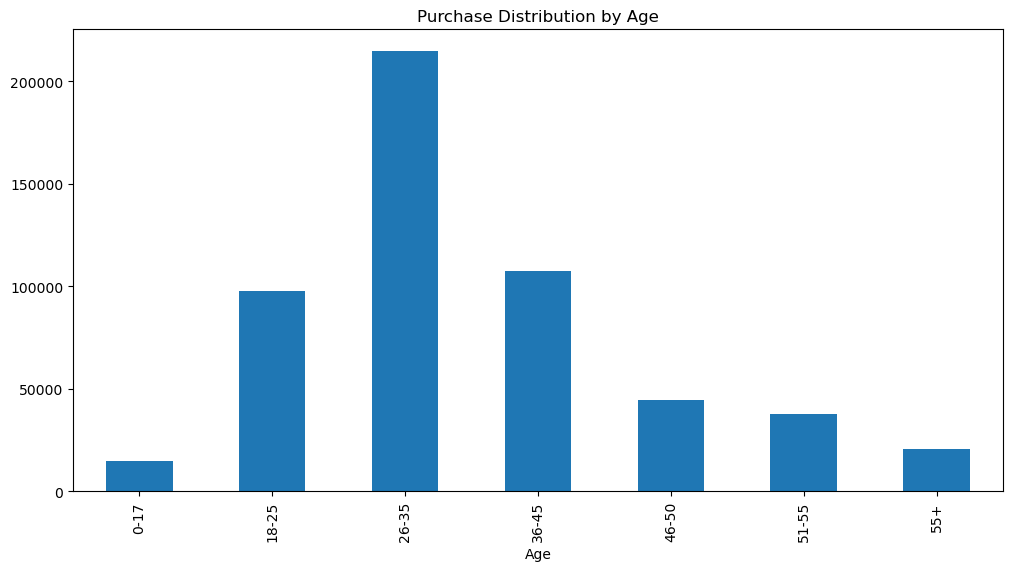

In [34]:
data.groupby("Age").size().plot(kind="bar",figsize=(12,6),title="Purchase Distribution by Age")

In [40]:
lst=[]
for i in data["Age"].unique():
    lst.append([i,data[data["Age"] == i]["Purchase"].nunique()])
    
data1=pd.DataFrame(lst,columns=["Age","Purchase"])

<Axes: xlabel='Age'>

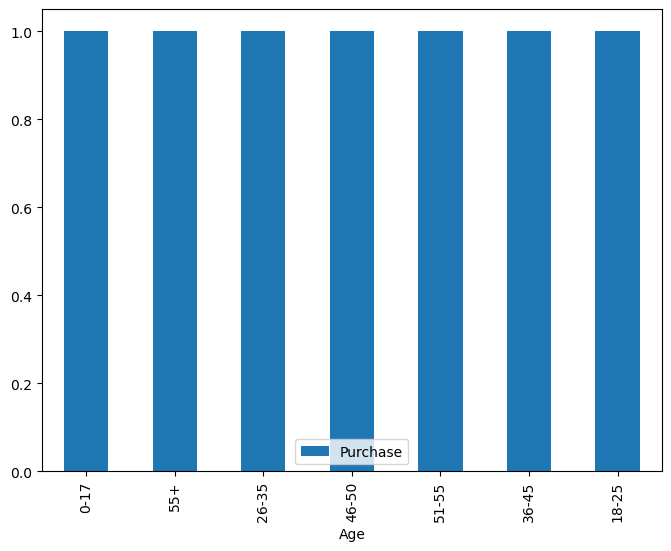

In [41]:
data1.plot.bar(x = 'Age', figsize = (8,6))

<Axes: title={'center': 'Amount Spend by Age'}, xlabel='Age'>

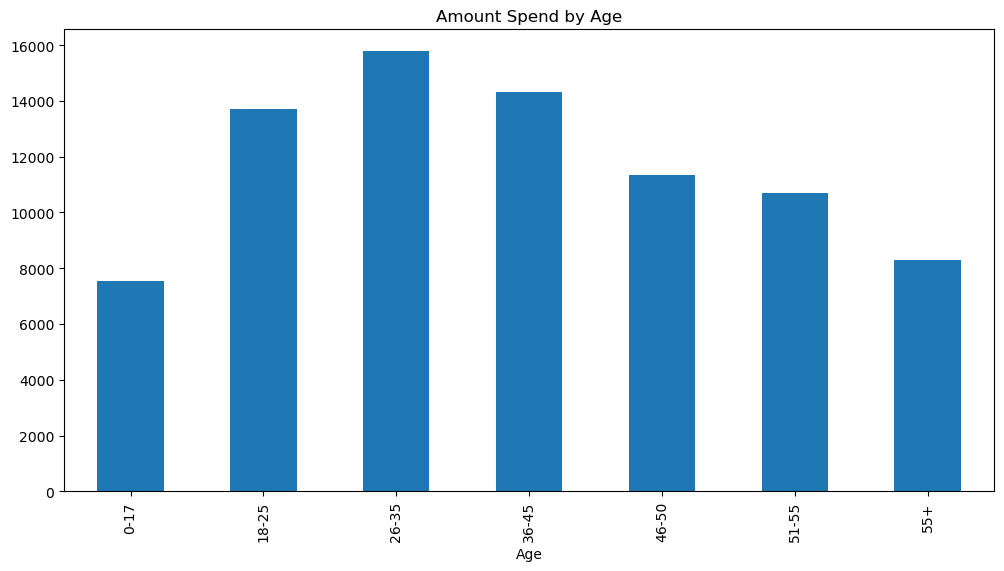

In [42]:
data.groupby('Age').sum()['Purchase'].plot(kind = 'bar', figsize = (12, 6), title = 'Amount Spend by Age')

<Axes: title={'center': 'Amount Spend by Age'}, xlabel='Age'>

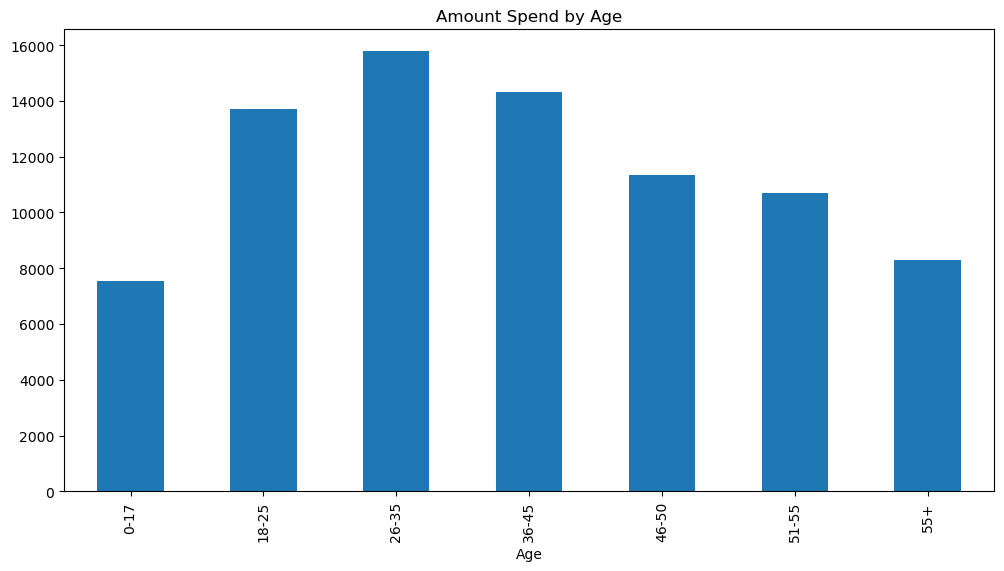

In [44]:
data.groupby('Age').mean()['Purchase'].plot(kind = 'bar', figsize = (12, 6), title = 'Amount Spend by Age')

<Axes: title={'center': 'Amount Spend by Age'}, ylabel='Purchase'>

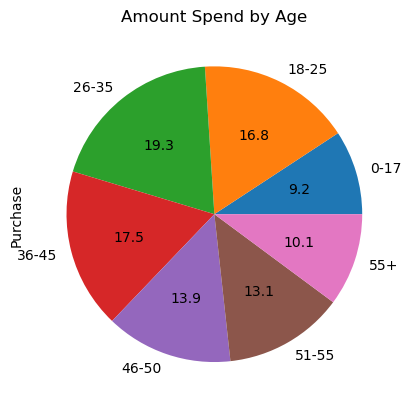

In [46]:
data.groupby('Age').mean()['Purchase'].plot(kind = 'pie', autopct="%.1f", title = 'Amount Spend by Age')

<Axes: >

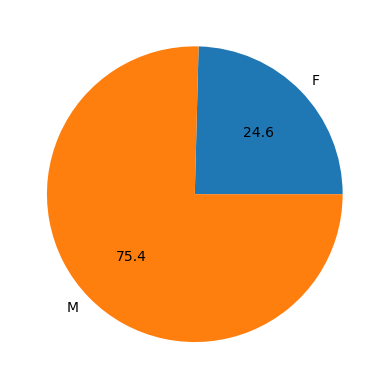

In [59]:
data.groupby('Gender').size().plot(kind = 'pie', 
                                 autopct="%.1f")

# Multicolumn analysis

<Axes: title={'center': 'Purchase Distribution by Age'}, xlabel='Age'>

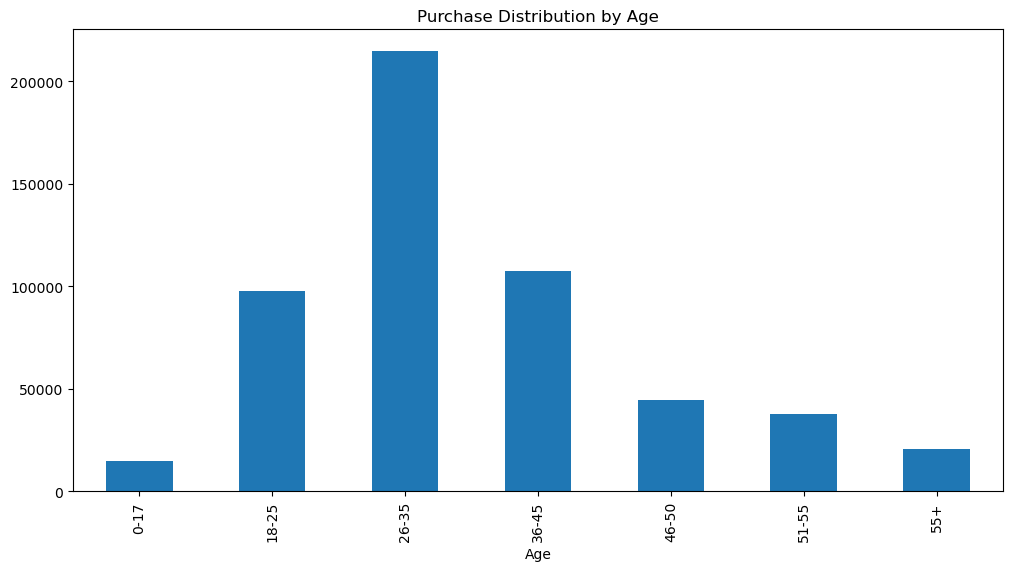

In [60]:
data.groupby('Age').size().plot(kind = 'bar', figsize = (12, 6), title = 'Purchase Distribution by Age')

<Axes: xlabel='Age', ylabel='count'>

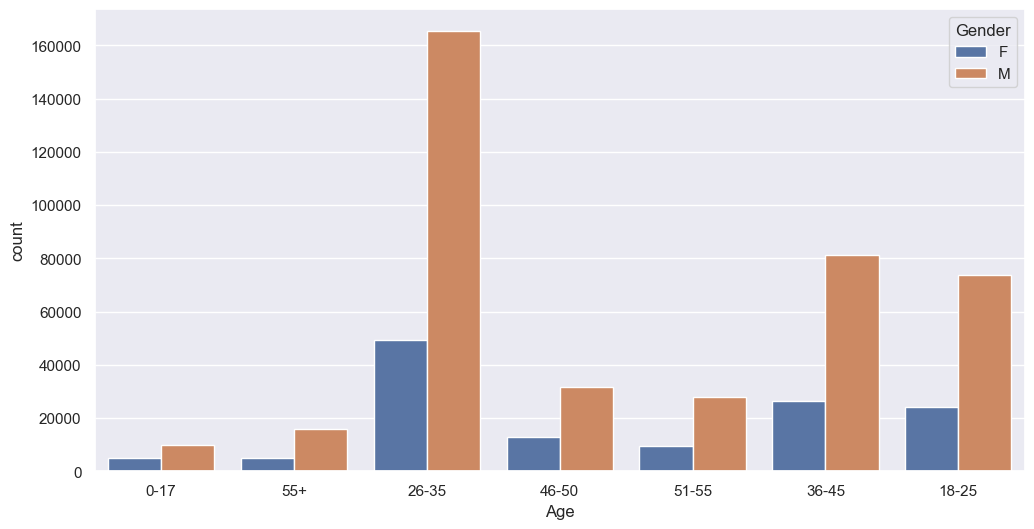

In [64]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x="Age",hue="Gender",data=data)

<Axes: xlabel='Gender', ylabel='count'>

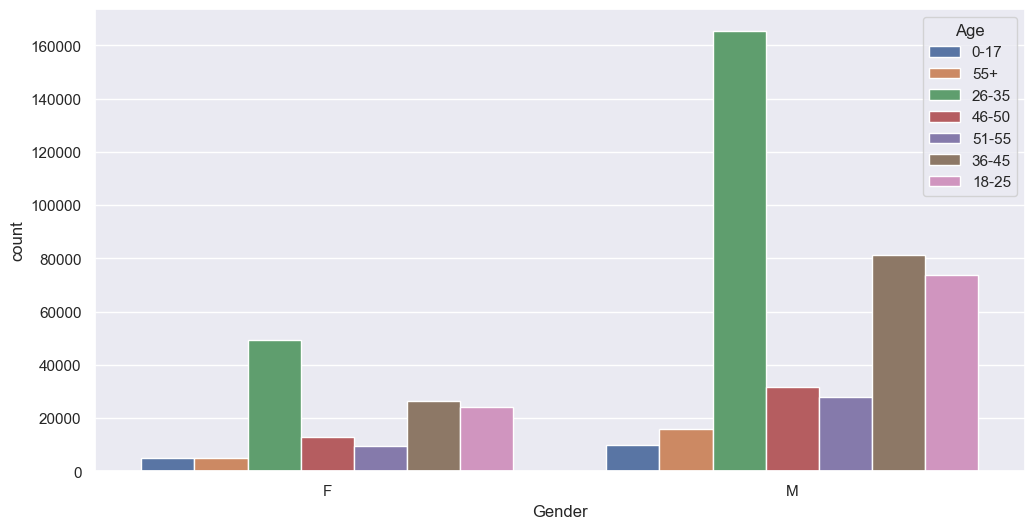

In [65]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x="Gender",hue="Age",data=data)

<Axes: xlabel='Gender', ylabel='count'>

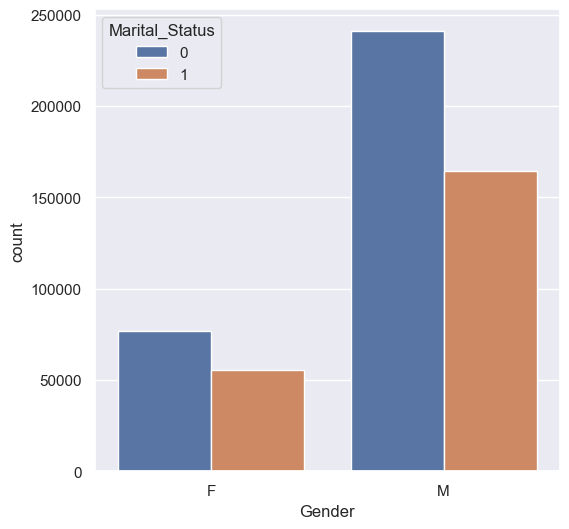

In [67]:
sns.set(rc={'figure.figsize':(6,6)})
sns.countplot(x="Gender",hue="Marital_Status",data=data)

<Axes: xlabel='Marital_Status', ylabel='count'>

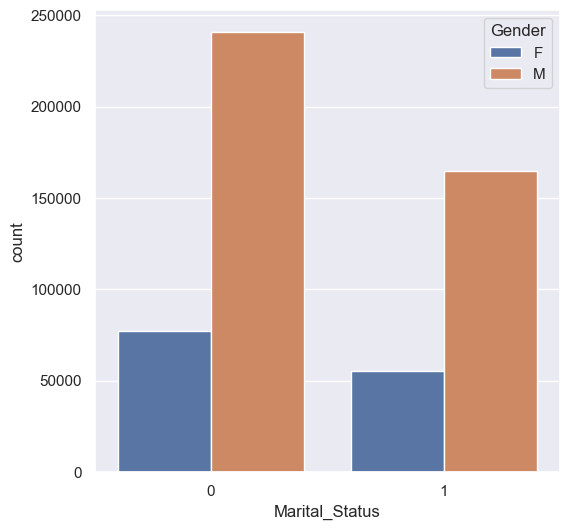

In [68]:
sns.set(rc={'figure.figsize':(6,6)})
sns.countplot(x="Marital_Status",hue="Gender",data=data)

<Axes: xlabel='City_Category', ylabel='count'>

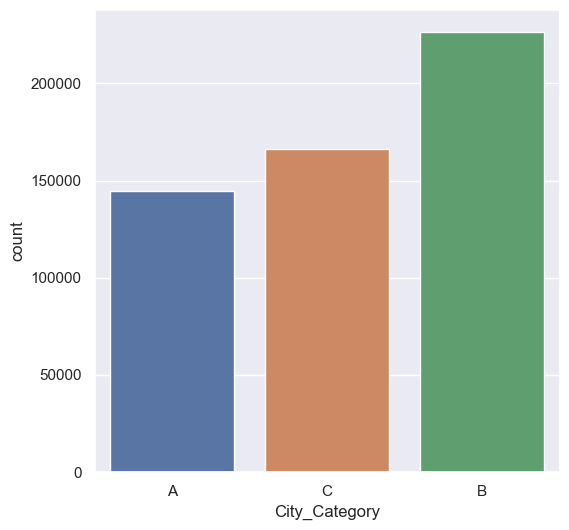

In [69]:
sns.countplot(x = data['City_Category'])

<Axes: xlabel='City_Category', ylabel='count'>

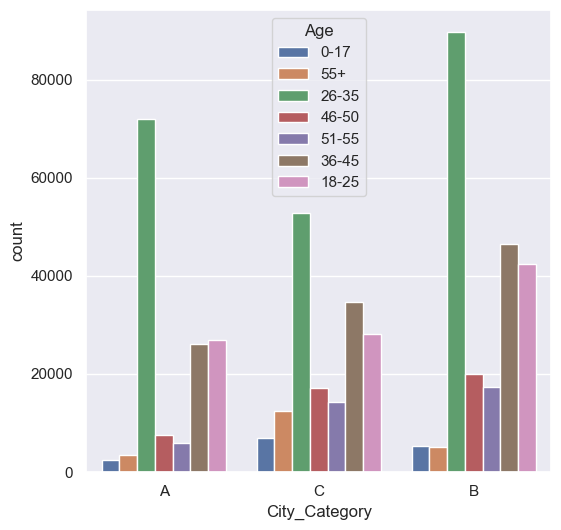

In [70]:
sns.countplot(x = data['City_Category'],hue="Age",data=data)

<Axes: xlabel='Marital_Status', ylabel='count'>

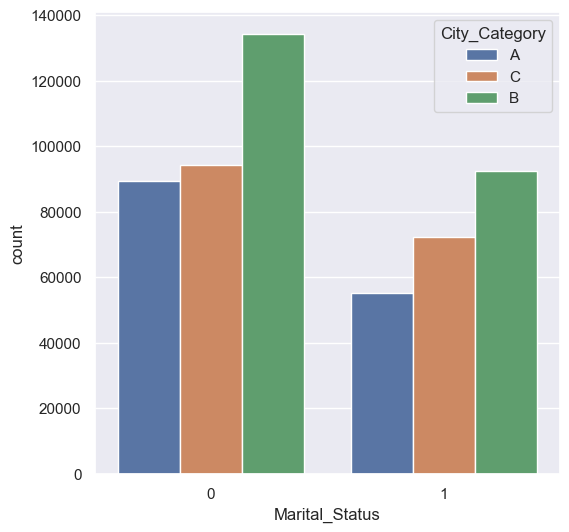

In [71]:
ns.countplot(x = 'Marital_Status', hue = 'City_Category', data = data)

<Axes: >

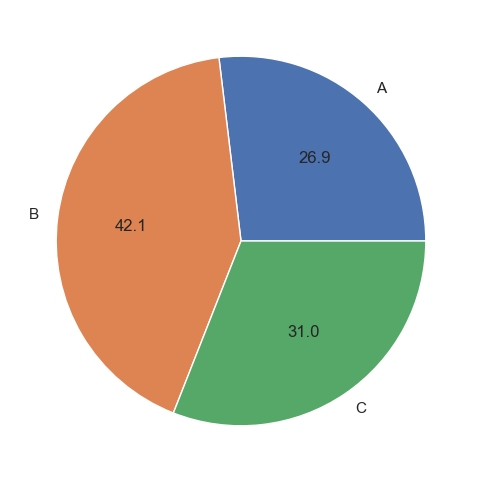

In [72]:
data.groupby('City_Category').size().plot(kind = 'pie', autopct = '%0.1f')

<Axes: xlabel='City_Category', ylabel='count'>

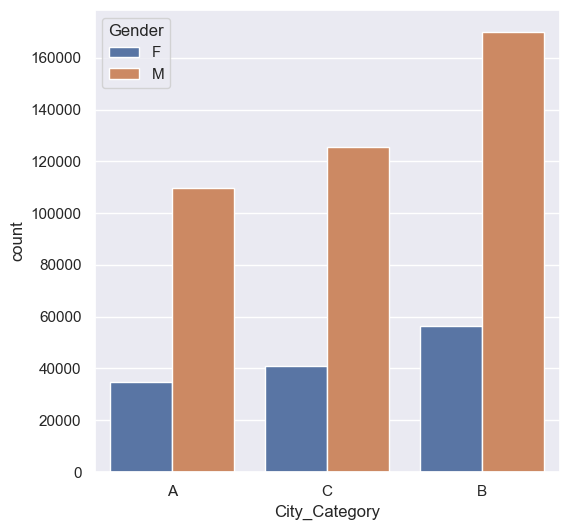

In [73]:
sns.countplot(x="City_Category",hue="Gender",data=data)

/var/folders/3y/lzqhbyv93v1c5dqddh3rqb6m0000gn/T/ipykernel_30159/264926138.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("City_Category").sum()["Purchase"].plot(kind="pie",autopct="%.1f")


<Axes: ylabel='Purchase'>

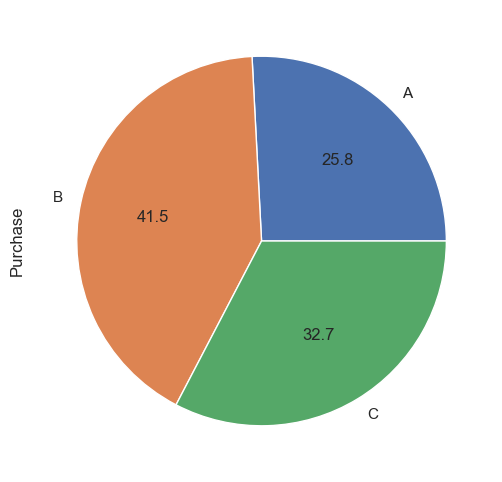

In [74]:
data.groupby("City_Category").sum()["Purchase"].plot(kind="pie",autopct="%.1f")

/var/folders/3y/lzqhbyv93v1c5dqddh3rqb6m0000gn/T/ipykernel_30159/2001505098.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("City_Category").mean()["Purchase"].plot(kind="pie",autopct="%.1f")


<Axes: ylabel='Purchase'>

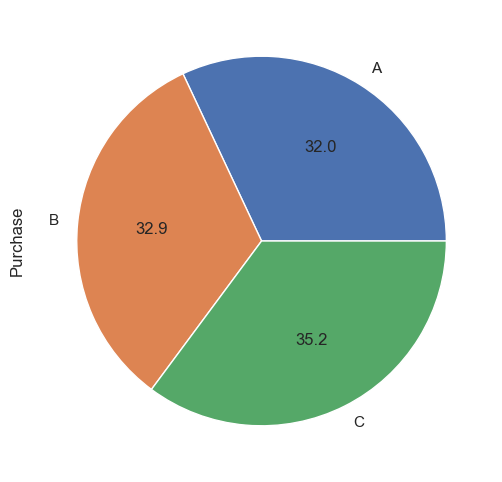

In [75]:
data.groupby("City_Category").mean()["Purchase"].plot(kind="pie",autopct="%.1f")

#  Occupation and Products Analysis

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

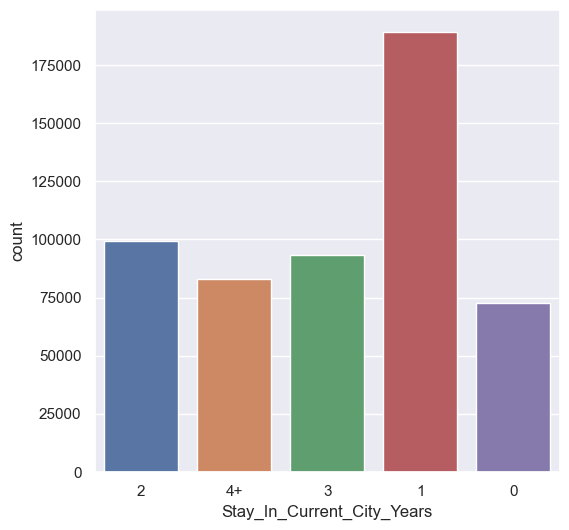

In [76]:
sns.countplot(x=data['Stay_In_Current_City_Years'])

<Axes: >

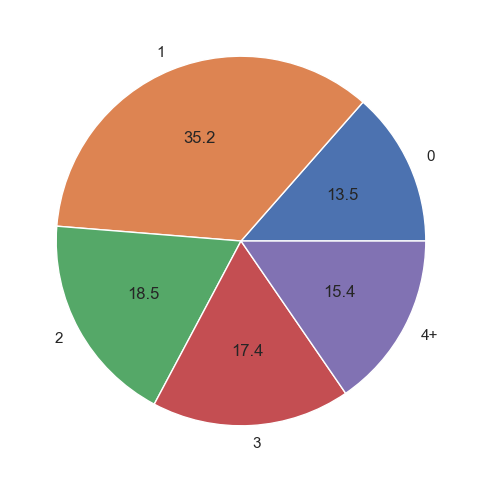

In [77]:
data.groupby("Stay_In_Current_City_Years").size().plot(kind="pie",autopct="%.1f")

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

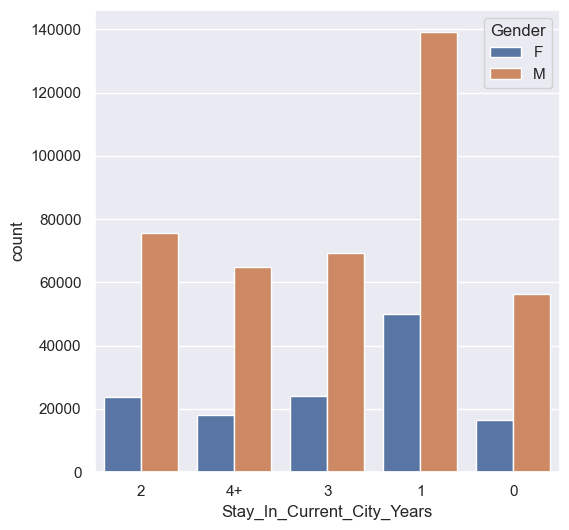

In [79]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'Gender', data = data)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

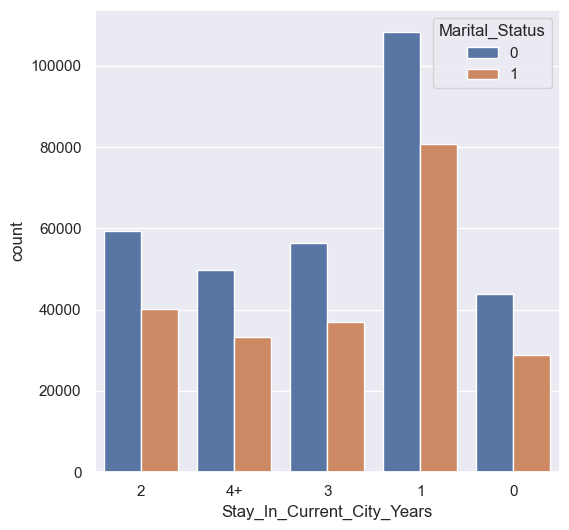

In [81]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'Marital_Status', data = data)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

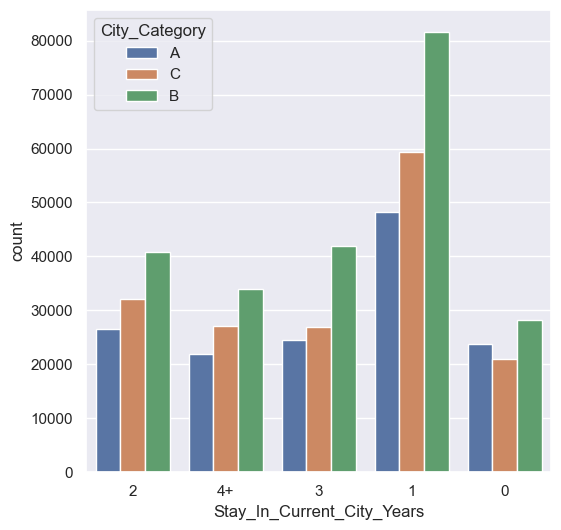

In [83]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'City_Category', data = data)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

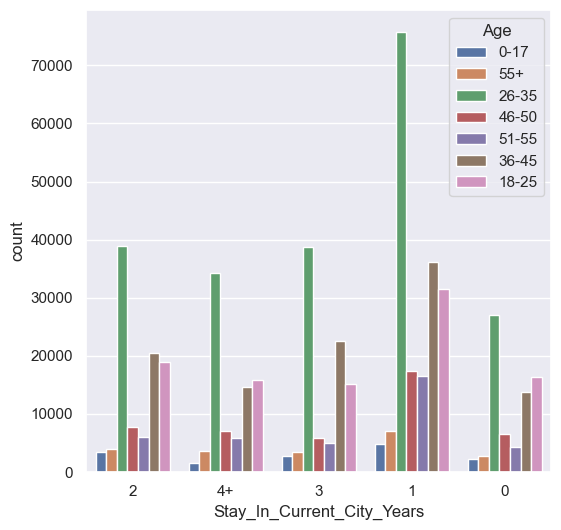

In [84]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'Age', data = data)

/var/folders/3y/lzqhbyv93v1c5dqddh3rqb6m0000gn/T/ipykernel_30159/1894466833.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('Stay_In_Current_City_Years').sum()['Purchase'].plot(kind = 'bar')


<Axes: xlabel='Stay_In_Current_City_Years'>

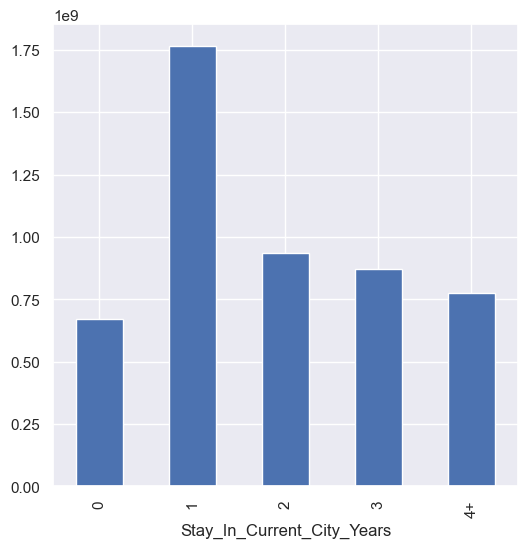

In [85]:
data.groupby('Stay_In_Current_City_Years').sum()['Purchase'].plot(kind = 'bar')

/var/folders/3y/lzqhbyv93v1c5dqddh3rqb6m0000gn/T/ipykernel_30159/123960931.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('Stay_In_Current_City_Years').mean()['Purchase'].plot(kind = 'bar')


<Axes: xlabel='Stay_In_Current_City_Years'>

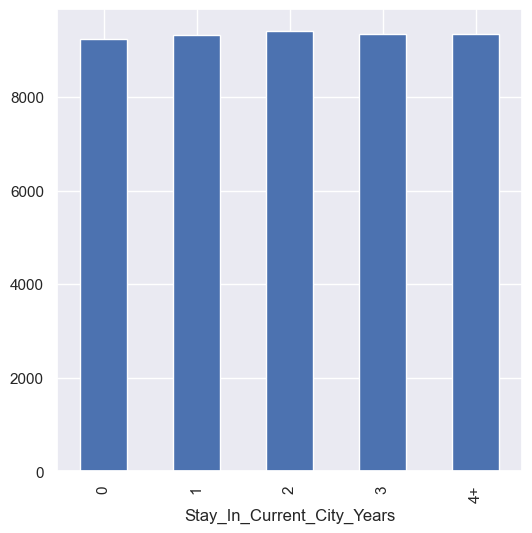

In [86]:
data.groupby('Stay_In_Current_City_Years').mean()['Purchase'].plot(kind = 'bar')

<Axes: xlabel='Occupation', ylabel='count'>

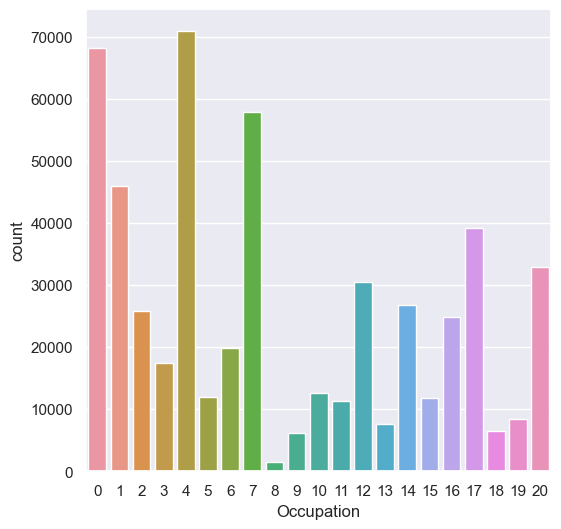

In [87]:
sns.countplot(x=data["Occupation"])

<Axes: xlabel='Occupation'>

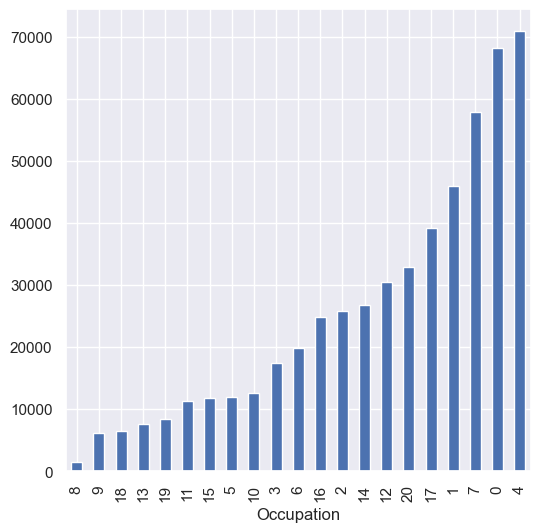

In [88]:
data.groupby("Occupation").size().sort_values().plot(kind="bar")

/var/folders/3y/lzqhbyv93v1c5dqddh3rqb6m0000gn/T/ipykernel_30159/3156569418.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("Occupation").sum()["Purchase"].sort_values().plot(kind="bar")


<Axes: xlabel='Occupation'>

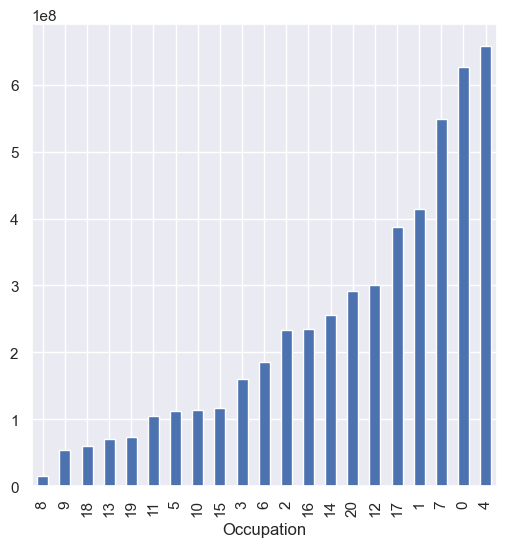

In [91]:
data.groupby("Occupation").sum()["Purchase"].sort_values().plot(kind="bar")

/var/folders/3y/lzqhbyv93v1c5dqddh3rqb6m0000gn/T/ipykernel_30159/4038690446.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("Occupation").mean()["Purchase"].sort_values().plot(kind="bar")


<Axes: xlabel='Occupation'>

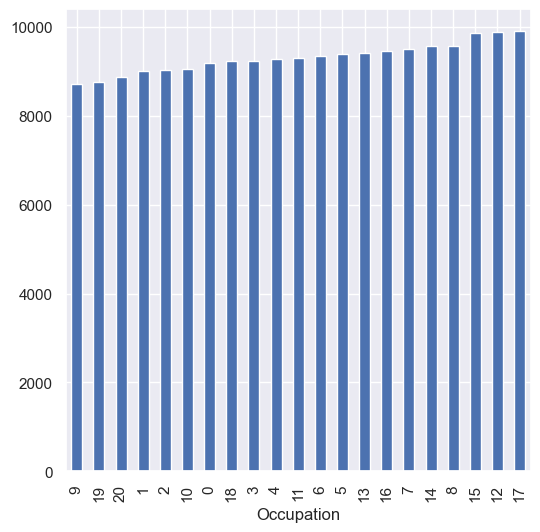

In [92]:
data.groupby("Occupation").mean()["Purchase"].sort_values().plot(kind="bar")

<Axes: xlabel='Occupation', ylabel='count'>

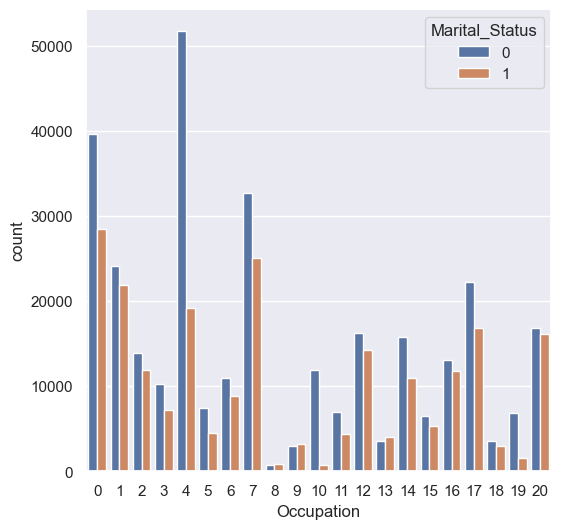

In [93]:
sns.countplot(x = 'Occupation', hue = 'Marital_Status', data = data)

<Axes: xlabel='Occupation', ylabel='count'>

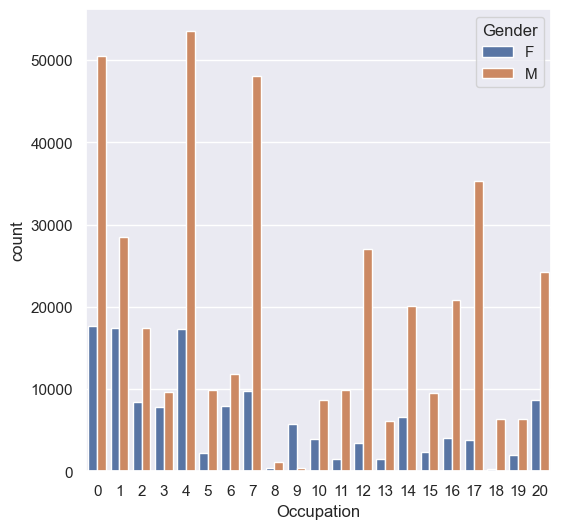

In [94]:
sns.countplot(x = 'Occupation', hue = 'Gender', data = data)

<Axes: xlabel='Occupation'>

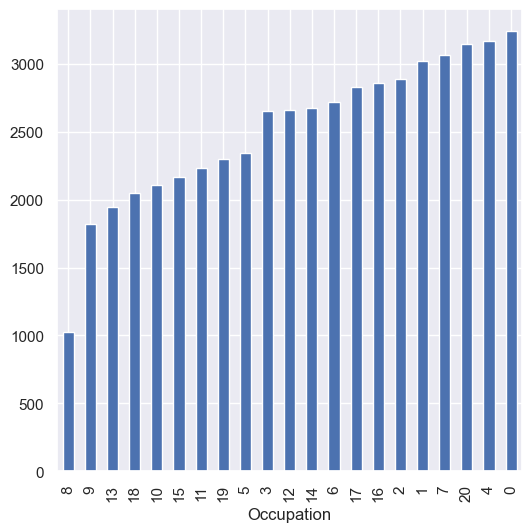

In [95]:
data.groupby('Occupation').nunique()['Product_ID'].sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_Category_1'>

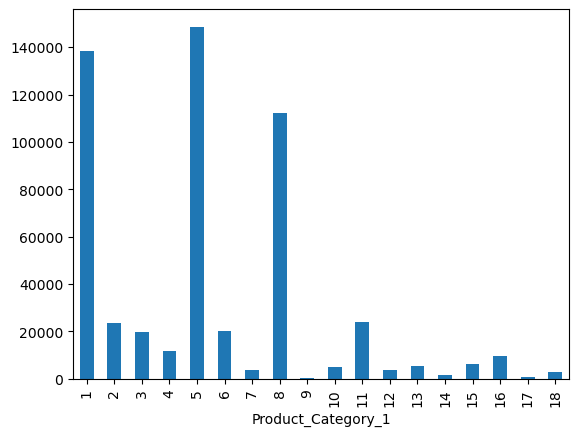

In [11]:
data.groupby("Product_Category_1").size().plot(kind="bar")

/var/folders/3y/lzqhbyv93v1c5dqddh3rqb6m0000gn/T/ipykernel_32965/4213126845.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('Product_Category_1').sum()['Purchase'].sort_values().plot(kind = 'bar')


<Axes: xlabel='Product_Category_1'>

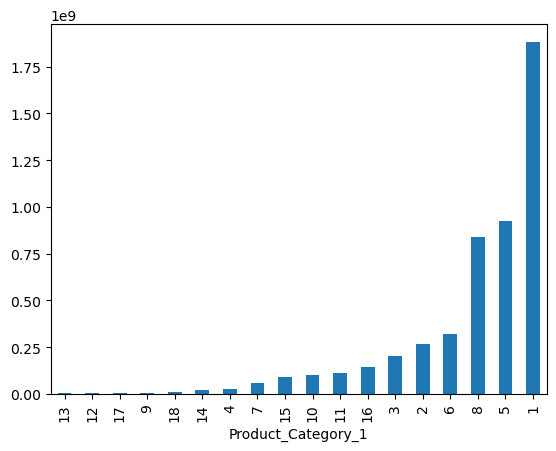

In [12]:
data.groupby('Product_Category_1').sum()['Purchase'].sort_values().plot(kind = 'bar')

/var/folders/3y/lzqhbyv93v1c5dqddh3rqb6m0000gn/T/ipykernel_32965/1093418227.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('Product_Category_1').mean()['Purchase'].sort_values().plot(kind = 'bar')


<Axes: xlabel='Product_Category_1'>

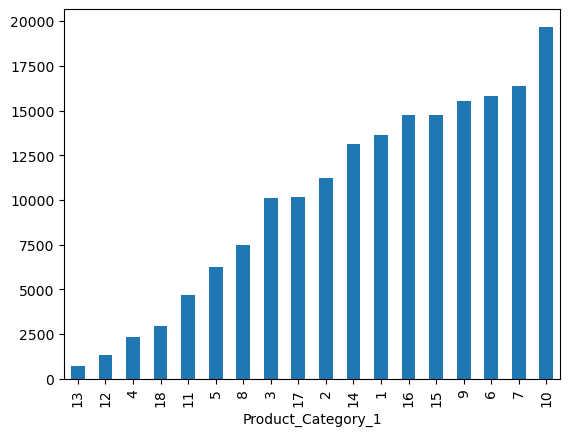

In [13]:
data.groupby('Product_Category_1').mean()['Purchase'].sort_values().plot(kind = 'bar')

/var/folders/3y/lzqhbyv93v1c5dqddh3rqb6m0000gn/T/ipykernel_32965/2002509559.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('Product_Category_1').sum()['Purchase'].nlargest(10).sort_values().plot(kind = 'bar')


<Axes: xlabel='Product_Category_1'>

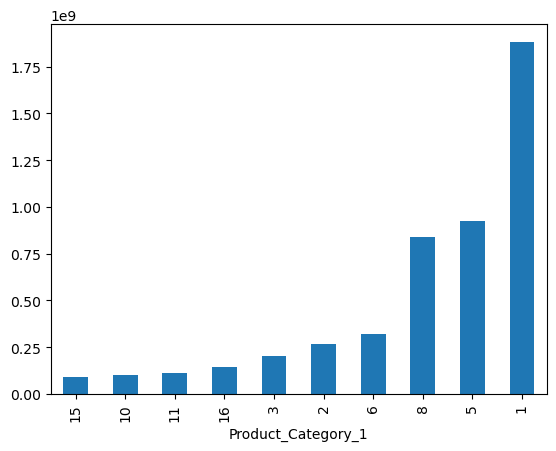

In [14]:
data.groupby('Product_Category_1').sum()['Purchase'].nlargest(10).sort_values().plot(kind = 'bar')

/var/folders/3y/lzqhbyv93v1c5dqddh3rqb6m0000gn/T/ipykernel_32965/3278647114.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('Product_Category_1').mean()['Purchase'].nlargest(10).sort_values().plot(kind = 'bar')


<Axes: xlabel='Product_Category_1'>

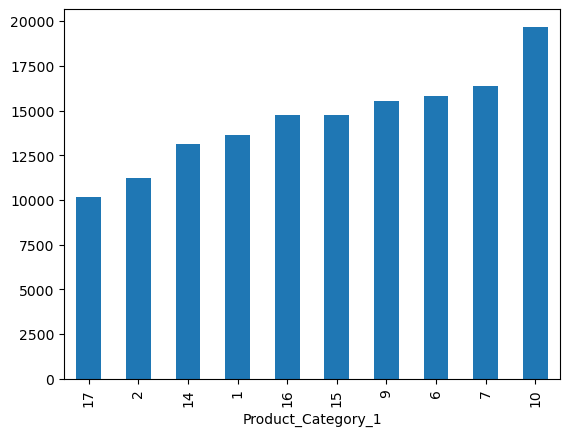

In [15]:
data.groupby('Product_Category_1').mean()['Purchase'].nlargest(10).sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_Category_1', ylabel='count'>

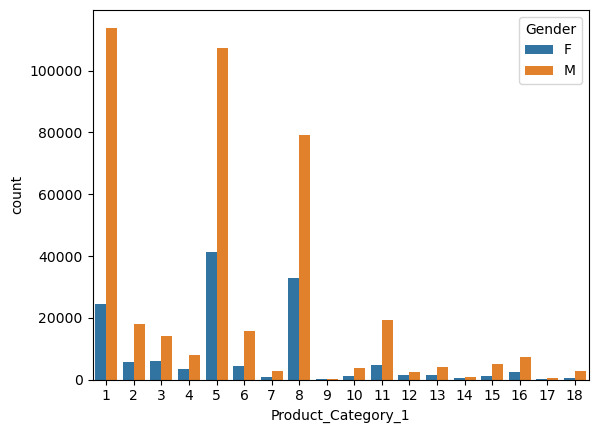

In [16]:
sns.countplot(x = 'Product_Category_1', hue = 'Gender', data = data)

<Axes: xlabel='Product_Category_1', ylabel='count'>

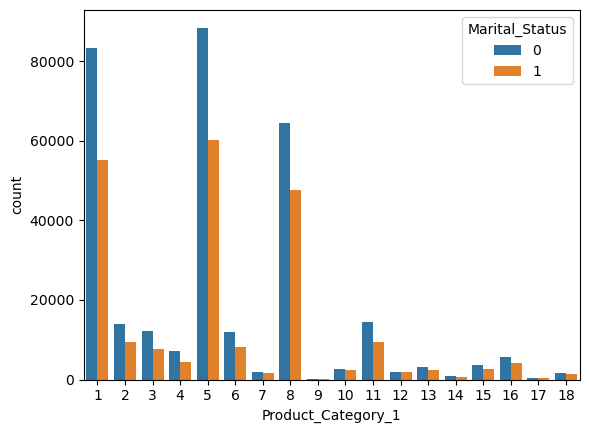

In [17]:
sns.countplot(x = 'Product_Category_1', hue = 'Marital_Status', data = data)